<a href="https://colab.research.google.com/github/Mahnazshamissa/Python/blob/main/Group_E_Train_SkLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install yellowbrick # machine learning visualization library https://www.scikit-yb.org/en/latest/

In [ ]:
# set the background colour of the plot to white
sns.set(style="whitegrid", color_codes=True)
# setting the plot size for all plots
sns.set(rc={'figure.figsize':(11.7,8.27)})

## **Data** - sales campaign data of an automotive parts wholesale supplier

## Prediction - build a predictive model to tell us which sales campaign will result in a loss and which will result in a win

In [ ]:
# tutorial https://www.dataquest.io/blog/sci-kit-learn-tutorial/
data_url = "https://raw.githubusercontent.com/vkrit/data-science-class/master/WA_Fn-UseC_-Sales-Win-Loss.csv" # Kaggle Data again https://www.kaggle.com/thatbrock/ibm-watson-saleswinloss
sales_data = pd.read_csv(data_url)
sales_data.head()

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,Exterior Accessories,Car Accessories,Northwest,Fields Sales,76,Won,13,104,101,0,5,5,0,Unknown,0.69636,0.113985,0.154215,1
1,1658010,Exterior Accessories,Car Accessories,Pacific,Reseller,63,Loss,2,163,163,0,3,5,0,Unknown,0.00000,1.000000,0.000000,1
2,1674737,Motorcycle Parts,Performance & Non-auto,Pacific,Reseller,24,Won,7,82,82,7750,1,1,0,Unknown,1.00000,0.000000,0.000000,1
3,1675224,Shelters & RV,Performance & Non-auto,Midwest,Reseller,16,Loss,5,124,124,0,1,1,0,Known,1.00000,0.000000,0.000000,1
4,1689785,Exterior Accessories,Car Accessories,Pacific,Reseller,69,Loss,11,91,13,69756,1,1,0,Unknown,0.00000,0.141125,0.000000,4


In [ ]:
sales_data.dtypes

Opportunity Number                           int64
Supplies Subgroup                           object
Supplies Group                              object
Region                                      object
Route To Market                             object
Elapsed Days In Sales Stage                  int64
Opportunity Result                          object
Sales Stage Change Count                     int64
Total Days Identified Through Closing        int64
Total Days Identified Through Qualified      int64
Opportunity Amount USD                       int64
Client Size By Revenue                       int64
Client Size By Employee Count                int64
Revenue From Client Past Two Years           int64
Competitor Type                             object
Ratio Days Identified To Total Days        float64
Ratio Days Validated To Total Days         float64
Ratio Days Qualified To Total Days         float64
Deal Size Category                           int64
dtype: object

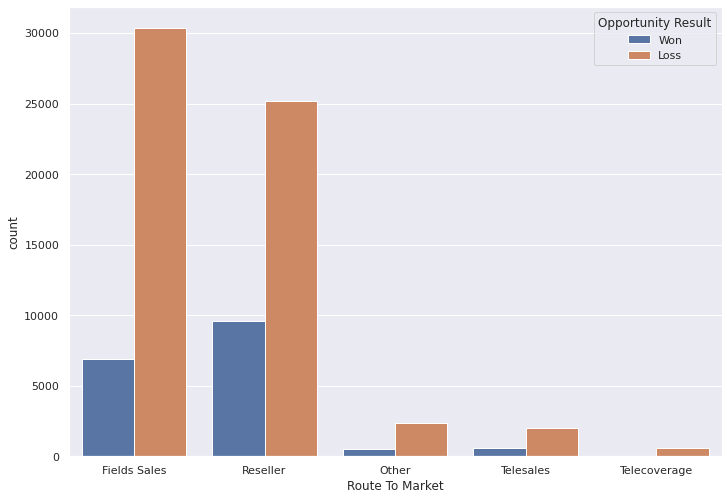

In [ ]:
sns.countplot(x = 'Route To Market',data=sales_data,hue = 'Opportunity Result');

In [ ]:
from sklearn import preprocessing

In [ ]:
# LabelEncoder
le = preprocessing.LabelEncoder()

In [ ]:
#convert the categorical columns into numeric
encoded_value = le.fit_transform(["paris", "paris", "tokyo", "amsterdam"])
print(encoded_value)

[1 1 2 0]


In [ ]:
sales_data['Supplies Subgroup'] = le.fit_transform(sales_data['Supplies Subgroup'])
print(le.classes_)
sales_data['Region'] = le.fit_transform(sales_data['Region'])
print(le.classes_)
sales_data['Route To Market'] = le.fit_transform(sales_data['Route To Market'])
print(le.classes_)
sales_data['Opportunity Result'] = le.fit_transform(sales_data['Opportunity Result'])
print(le.classes_)
sales_data['Competitor Type'] = le.fit_transform(sales_data['Competitor Type'])
print(le.classes_)
sales_data['Supplies Group'] = le.fit_transform(sales_data['Supplies Group'])
print(le.classes_)


['Batteries & Accessories' 'Car Electronics' 'Exterior Accessories'
 'Garage & Car Care' 'Interior Accessories' 'Motorcycle Parts'
 'Performance Parts' 'Replacement Parts' 'Shelters & RV' 'Tires & Wheels'
 'Towing & Hitches']
['Mid-Atlantic' 'Midwest' 'Northeast' 'Northwest' 'Pacific' 'Southeast'
 'Southwest']
['Fields Sales' 'Other' 'Reseller' 'Telecoverage' 'Telesales']
['Loss' 'Won']
['Known' 'None' 'Unknown']
['Car Accessories' 'Car Electronics' 'Performance & Non-auto'
 'Tires & Wheels']


In [ ]:
sales_data.head()

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,2,0,3,0,76,1,13,104,101,0,5,5,0,2,0.69636,0.113985,0.154215,1
1,1658010,2,0,4,2,63,0,2,163,163,0,3,5,0,2,0.00000,1.000000,0.000000,1
2,1674737,5,2,4,2,24,1,7,82,82,7750,1,1,0,2,1.00000,0.000000,0.000000,1
3,1675224,8,2,1,2,16,0,5,124,124,0,1,1,0,0,1.00000,0.000000,0.000000,1
4,1689785,2,0,4,2,69,0,11,91,13,69756,1,1,0,2,0.00000,0.141125,0.000000,4


In [ ]:
le.classes_

array(['amsterdam', 'paris', 'tokyo'], dtype='<U9')

# Split Intro Training and Testing Data

In [ ]:
cols = [col for col in sales_data.columns if col not in ['Opportunity Number','Opportunity Result']]
cols

['Supplies Subgroup',
 'Supplies Group',
 'Region',
 'Route To Market',
 'Elapsed Days In Sales Stage',
 'Sales Stage Change Count',
 'Total Days Identified Through Closing',
 'Total Days Identified Through Qualified',
 'Opportunity Amount USD',
 'Client Size By Revenue',
 'Client Size By Employee Count',
 'Revenue From Client Past Two Years',
 'Competitor Type',
 'Ratio Days Identified To Total Days',
 'Ratio Days Validated To Total Days',
 'Ratio Days Qualified To Total Days',
 'Deal Size Category']

In [ ]:
X = sales_data[cols]
y = sales_data['Opportunity Result']

X.head()

,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,2,0,3,0,76,13,104,101,0,5,5,0,2,0.69636,0.113985,0.154215,1
1,2,0,4,2,63,2,163,163,0,3,5,0,2,0.00000,1.000000,0.000000,1
2,5,2,4,2,24,7,82,82,7750,1,1,0,2,1.00000,0.000000,0.000000,1
3,8,2,1,2,16,5,124,124,0,1,1,0,0,1.00000,0.000000,0.000000,1
4,2,0,4,2,69,11,91,13,69756,1,1,0,2,0.00000,0.141125,0.000000,4


In [ ]:
from sklearn.model_selection import KFold
X = sales_data[cols] # create an array
y = sales_data['Opportunity Result'] # Create another array
kf = KFold(n_splits=4) # Define the split - into 4 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

4

In [ ]:
kf=KFold(n_splits=4, random_state=1, shuffle=True)

In [ ]:
sales_CV = kf.split(X,y)
sales_CV

<generator object _BaseKFold.split at 0x7fe935d98620>

In [ ]:
 from sklearn.model_selection import ShuffleSplit, cross_val_score
 from sklearn import svm
 clf = svm.SVC(kernel='linear', C=1)
 n_samples = X.shape[0]
 cv = ShuffleSplit(n_splits=4, test_size=0.3, random_state=0)
 cross_val_score(clf, X, y, cv=cv)

In [ ]:
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

KeyError: ignored

In [ ]:
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

TypeError: ignored

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, shuffle=True)

In [ ]:
X.shape[0], X_train.shape[0]

(78025, 54617)

## **But** **First**

- look here when deciding which alrogithm to use https://scikit-learn.org/stable/tutorial/machine_learning_map/

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()

In [ ]:
fitted_model = gnb.fit(X_train, y_train) # Train

## Check which features helped the classifier more, e.g. Feature Importance

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
gnb.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [ ]:
imps = permutation_importance(gnb, X_test, y_test) # doc https://scikit-learn.org/stable/modules/permutation_importance.html#permutation-importance
print(imps.importances_mean)

[ 1.27306904e-03  2.99043062e-04  6.49350649e-04  1.32433356e-03
  1.87969925e-04  5.14354067e-03 -1.10133288e-02 -6.92925496e-03
  9.10799727e-03  2.47778537e-04  2.99043062e-04  6.00649351e-03
  3.41763500e-05  1.79425837e-04  4.10116200e-04  7.17703349e-04
  4.05844156e-03]


In [ ]:
for i in imps.importances_mean.argsort()[::-1]:
  if imps.importances_mean[i] - 2 * imps.importances_std[i] > 0:
    print(f"{X_test.columns[i]:<8}", 
          f"{imps.importances_mean[i]:.3f}", 
          f" +/- {imps.importances_std[i]:.3f}")
    
# argsort -> returns the indices that would sort an array

Opportunity Amount USD 0.009  +/- 0.002
Revenue From Client Past Two Years 0.006  +/- 0.000
Sales Stage Change Count 0.005  +/- 0.001
Deal Size Category 0.004  +/- 0.001
Route To Market 0.001  +/- 0.000
Supplies Subgroup 0.001  +/- 0.000
Ratio Days Qualified To Total Days 0.001  +/- 0.000
Supplies Group 0.000  +/- 0.000
Ratio Days Identified To Total Days 0.000  +/- 0.000


## Now let's do the prediction

In [ ]:
y_pred = fitted_model.predict(X_test) # Predict
# y_pred <> y_test

# Evaluate the performance of the trained model

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print("Naive-Bayes accuracy : ",accuracy_score(y_test, y_pred, normalize = True))

Naive-Bayes accuracy :  0.7553827751196173


## ! Important accuracy Fallacy[link text]

In [ ]:
from yellowbrick.classifier import ClassificationReport # doc here https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


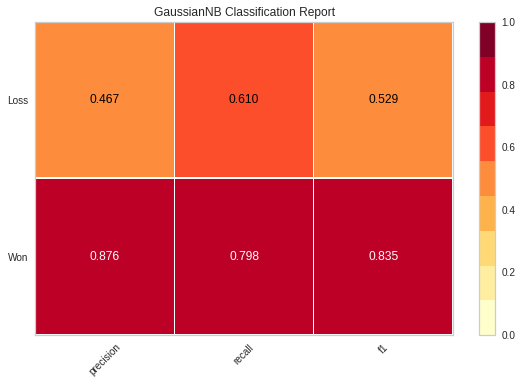

In [ ]:
visualizer = ClassificationReport(gnb, classes=['Won','Loss'])
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

# choose models that are “redder”, e.g. have stronger classification metrics or that are more balanced